In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os

im_height = 224
im_width = 224
saveModelName='genderclassification.h5'

covn_base = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(im_width, im_height, 3))
model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=["accuracy"])

model.load_weights(saveModelName)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


Predicted Result  Female


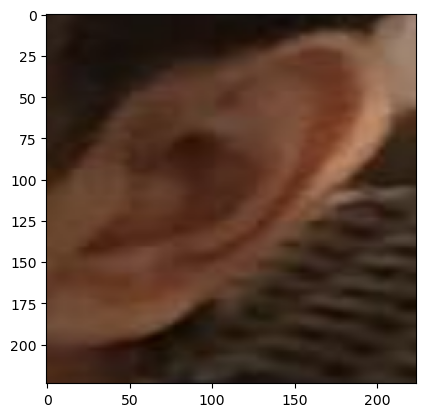

In [2]:
import cv2
img_path = "E:/mcaprojects/ear/Dataset/test/male/084 (54).jpg"
img = cv2.imread(img_path)
data_list=[]
img=cv2.resize(img, (224,224)) # resize the image
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # cv2 creates bgr images, convert to rgb images
data_list.append(img)  # append processed image to the list
data=np.array(data_list)/255 # convert to an np array and rescale images
predictions=model.predict(data,batch_size=1, verbose=0 )
names=["Female","Male"]
result=names[1]
if(predictions[0][0]<0.5):
        result=names[0]
print("Predicted Result ", result)
plt.imshow(img)
